In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [2]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 

{'pred_probs': array([0.03759456, 0.07546451, 0.12573424, 0.17518525, 0.22348126,
        0.27358388, 0.3222112 , 0.36851944, 0.41841287, 0.45782312]),
 'emp_probs': array([0.00214133, 0.00761523, 0.02112211, 0.02928128, 0.0392085 ,
        0.04640719, 0.05982143, 0.07103825, 0.04545455, 0.        ]),
 'bin_counts': array([ 934., 2495., 3030., 3381., 2729., 2004., 1120.,  366.,   66.,
           7.])}

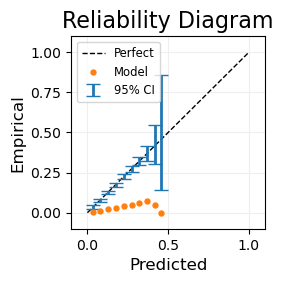

In [3]:
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'], tp1)

{'pred_probs': array([0.03574607, 0.07595601, 0.12382107, 0.17221817, 0.21959358,
        0.26644139, 0.31884359, 0.3736154 ]),
 'emp_probs': array([0.00231481, 0.00841711, 0.01969093, 0.02120278, 0.03865717,
        0.03867403, 0.        , 0.        ]),
 'bin_counts': array([2.160e+03, 4.277e+03, 4.012e+03, 2.594e+03, 9.830e+02, 1.810e+02,
        1.700e+01, 2.000e+00])}

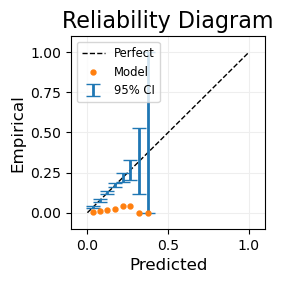

In [4]:
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test2['golds'], tp2)

{'pred_probs': array([0.03639903, 0.07152344, 0.12112341, 0.17013462, 0.2218143 ,
        0.26529003, 0.3210046 ]),
 'emp_probs': array([0.00457501, 0.00895959, 0.02165725, 0.03650587, 0.03515625,
        0.01923077, 0.125     ]),
 'bin_counts': array([4153., 5469., 2124.,  767.,  256.,   52.,    8.])}

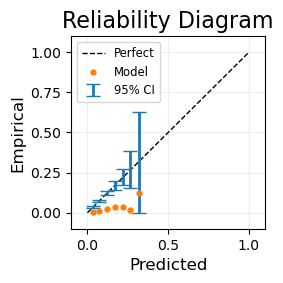

In [5]:
 
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'], tp3)

{'pred_probs': array([0.03580042, 0.070764  , 0.12136943, 0.17104232, 0.22115951,
        0.26696593, 0.31780119]),
 'emp_probs': array([0.00204825, 0.00722022, 0.01721939, 0.02514793, 0.03041825,
        0.06451613, 0.22222222]),
 'bin_counts': array([4394., 4709., 1568.,  676.,  263.,   62.,    9.])}

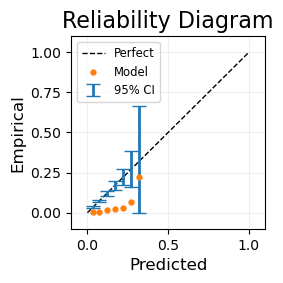

In [6]:

figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'], tp4)

In [7]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]


In [33]:
def spl_smote(pos, subneg, p_test, y_test, 
               synth_size):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

    spline = mli.SplineCalib(unity_prior=True)
    spline.fit(probs, subgold)
    spline_test = spline.predict(p_test) 
    figure (figsize=(2.5,2.5))

    mli.plot_reliability_diagram(y_test,  spline_test)


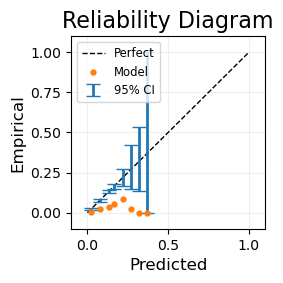

In [34]:
spl_smote(pos_1, subneg=np.random.choice(neg_1, 50*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=5)

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\optimize\_optimize.py:72: RuntimeWarning: overflow encountered in exp
  fg = self.fun(x, *args)


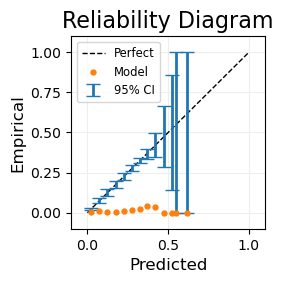

In [10]:
spl_smote(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=15)

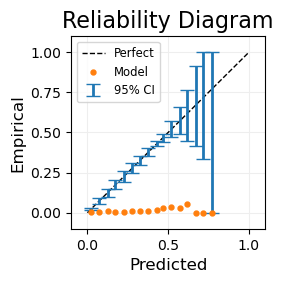

In [11]:
spl_smote(pos_2, subneg=np.random.choice(neg_2, 40*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=20)

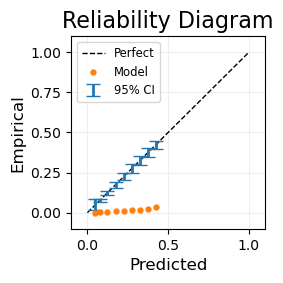

In [14]:
spl_smote(pos_3, subneg=np.random.choice(neg_3, 20*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=5)

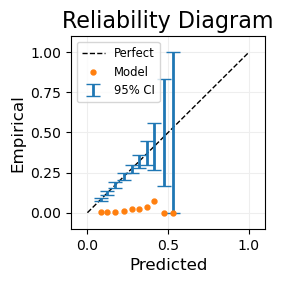

In [30]:
spl_smote(pos_4,  np.random.choice(neg_4, 40*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=7)

In [70]:
pos = pos_2
subneg = np.random.choice(neg_2, 50*sum(gold2))
p_test = tp2
y_test= M_test2['golds']
synth_size=10

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\optimize\_optimize.py:72: RuntimeWarning: overflow encountered in exp
  fg = self.fun(x, *args)


{'pred_probs': array([0.02146908, 0.07398552, 0.12571896, 0.17613284, 0.22820186,
        0.26748439, 0.31164413, 0.36977149, 0.4670401 ]),
 'emp_probs': array([0.00311042, 0.00794224, 0.00851393, 0.01000589, 0.02198582,
        0.02487906, 0.02752294, 0.        , 0.        ]),
 'bin_counts': array([2.572e+03, 1.385e+03, 1.292e+03, 1.699e+03, 2.820e+03, 4.341e+03,
        1.090e+02, 7.000e+00, 1.000e+00])}

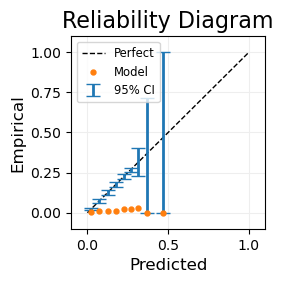

In [71]:
a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
many_pos = np.concatenate((pos, synth_pos))
probs = np.concatenate((subneg, many_pos))
subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

#spline = mli.SplineCalib( knot_sample_size=15, cv_spline=5, unity_prior=True, logodds_scale=False)
spline = mli.SplineCalib(knot_sample_size=15 )

spline.fit(probs, subgold)
spline_test = spline.predict(p_test) 

#calib_test = calibrate(spline_test)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(y_test,  spline_test)

In [72]:
calib_test = spline.calibrate(p_test)

In [74]:
p_test

array([0.10135774, 0.03609286, 0.1520739 , ..., 0.0710598 , 0.07571153,
       0.12577072])

In [101]:
def spl_smote_Options(pos, subneg, p_test, y_test, 
               synth_size):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

    #spline = mli.SplineCalib( knot_sample_size=15, cv_spline=5, unity_prior=True, logodds_scale=False)
    spline = mli.SplineCalib(knot_sample_size=15 )

    spline.fit(probs, subgold)
    spline.calibrate(probs)

    spline.predict(p_test)
    #spline_test = spline.predict(p_test) 
    calib_test = spline.calibrate(p_test)
    figure (figsize=(2.5,2.5))

    mli.plot_reliability_diagram(y_test,  calib_test)
    return spline_test

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\optimize\_optimize.py:72: RuntimeWarning: overflow encountered in exp
  fg = self.fun(x, *args)


array([0.18966504, 0.01539084, 0.25782494, ..., 0.09623466, 0.11162449,
       0.23479369])

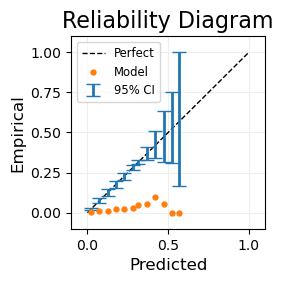

In [102]:
 spl_smote_Options(pos_1,  np.random.choice(neg_1, 50*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=15)

In [103]:
f_spl_2 = spl_smote_Options(pos_2,  np.random.choice(neg_2, 50*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=10)

array([0.18966504, 0.01539084, 0.25782494, ..., 0.09623466, 0.11162449,
       0.23479369])

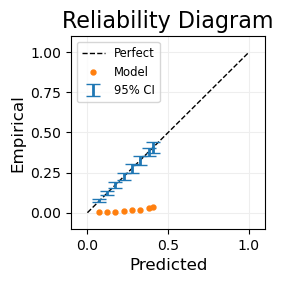

In [99]:
spl_smote_Options(pos_3,  np.random.choice(neg_3, 40*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=15)

array([0.18966504, 0.01539084, 0.25782494, ..., 0.09623466, 0.11162449,
       0.23479369])

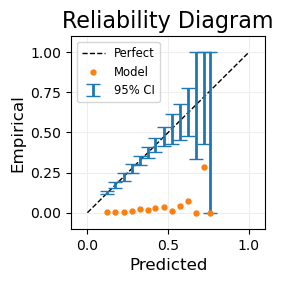

In [100]:
spl_smote_Options(pos_4,  np.random.choice(neg_4, 50*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=15)

AttributeError: 'numpy.ndarray' object has no attribute 'calibrate'

array([0.20483883, 0.11985286, 0.27968855, ..., 0.2832014 , 0.20776031,
       0.39547585])

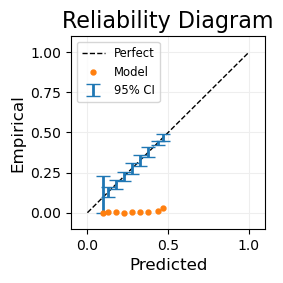

In [78]:
spl_smote_Options(pos_3,  np.random.choice(neg_3, 50*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=15)

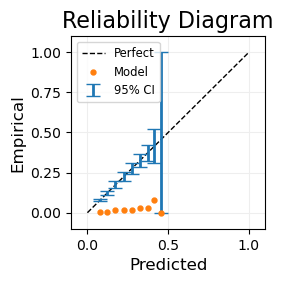

In [57]:
spl_smote_Options(pos_4,  np.random.choice(neg_4, 50*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=8)